<h1 style='color:blue;font-size:18px;text-align: center;'>CAPSTONE PROJECT<h1><h2 style='color:blue;font-size:18px;;text-align: center;'> PREDICTING  PGA TOUR PLAYER'S CHANCE TO  WIN  A PGA TOUR TOURNAMENT<h2>

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pylab as pl

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score,precision_recall_curve, roc_curve,confusion_matrix,accuracy_score, recall_score, precision_score,plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

from google.cloud import storage
# WARNING; WORKAROUND to prevent timeout for files > 6 MB on 800 kbps upload link.
storage.blob._DEFAULT_CHUNKSIZE = 5 * 1024* 1024  # 20 MB
storage.blob._MAX_MULTIPART_SIZE = 5 * 1024* 1024  # 20 MB


import warnings
warnings.filterwarnings('ignore')

<h5 style='color:blue;font-size:18px'>Web Scrapping to get the data input</h5>

<p>The data input containing the relevant statistics for each PGA player who has competed in PGA tournaments from 
2011-2021 is contained in the website: https://www.pgatour.com/stats.html. As a result, it was necessary Web 
Scrapping to get the data, and built the database iteratively.</p>

<h6 style='color:red;font-size:14px'>Generate different arrays related to the PGA tour's statistics that will facilitate the web scrapping in the 
aforementioned website</h6>

In [ ]:
score_1=['/stats/stat.120','/stats/stat.120','/stats/stat.120','/stats/stat.103','/stats/stat.101','/stats/stat.02401',
        '/stats/stat.02402','/stats/stat.02405','/stats/stat.02409','/stats/stat.02567','/stats/stat.02569',
        '/stats/stat.02568','/stats/stat.02564','/stats/stat.02564','/stats/stat.02674','/stats/stat.02674',
         '/stats/stat.02674','/stats/stat.02674','/stats/stat.02435','/stats/stat.111','/stats/stat.213','/stats/stat.01008','/stats/stat.02419','/stats/stat.156',
        '/stats/stat.419']
score_2=['Scoring','Scoring','Scoring','G','D','C','B','S','C','S','SG','SG','SG','SG','SG','SG','SG','SG','R','Sand',
        'H','F','Bogey Average','Birdie Average','Going']
score_3=['0','0','0','1','0','0','1','3','1','1','3','2','4','4','0','0','0','0','0','0','0','0','0','0','0']
score_4=['Scoring Average','Scoring Average','Scoring Average','Greens in Regulation Percentage','Driving Distance',
        'Club Head Speed','Ball Speed','Spin Rate','Carry Distance','SG: Off-the-Tee','SG: Around-the-Green',
        'SG: Approach the Green','SG: Putting','SG: Putting','SG: Tee-to-Green','SG: Tee-to-Green','SG: Tee-to-Green',
         'SG: Tee-to-Green','Rough Tendency','Sand Save Percentage','Hit Fairway Percentage','Fairway Bunker Tendency',
        'Bogey Average','Birdie Average','Going for the Green']
score_5=['AVG','TOTAL ROUNDS','TOTAL STROKES','%','AVG.','AVG.','AVG.','AVG.','AVG.','TOTAL SG:OTT','TOTAL SG:ARG',
        'TOTAL SG:APP','AVERAGE','TOTAL SG:PUTTING','AVERAGE','SG:OTT','SG:APR','SG:ARG','%','%','%','%',
         'AVERAGE BOGEYS PER ROUND','AVG','%']
print(len(score_1),len(score_2),len(score_3),len(score_4),len(score_5))

<h6 style='color:red;font-size:12px'>Array that contains the years where the PGA tour's statistics are collected</h6>

In [102]:
years_1=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

<h6 style='color:red;font-size:12px'>Dynamically create Dataframe for each year where PGA tour's statistics are
collected</h6>

In [ ]:
data_1=['df_2011','df_2012','df_2013','df_2014','df_2015','df_2016','df_2017','df_2018','df_2019','df_2020','df_2021']
for eachData in data_1:
    vars()[eachData] = pd.DataFrame()
   
data_f=[df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021]

<h6 style='color:blue;font-size:14px'>Code to carry out the web scrapping to get the average
independent variables selected per pga tour player from 2011-2021</h6>

<p style='color:black;font-size:14px;font-weight: bold'>Note:</p><p>This code was slightly modified from an original code located in the following website:
https://www.kaggle.com/code/willbates13/pga-tour-web-scraping/notebook</p>

In [ ]:
# Looping through each year. 
for j in range(len(years_1)):
    for i in  range(len(score_1)):
        page = 'https://www.pgatour.com' + score_1[i].__str__()  + '.html'
        req = requests.get(page)
        soup = bs(req.text, 'html.parser')
    
# Finding the  correct part of html code

        tab = soup.find('div',attrs={'class','tabbable-head clearfix hidden-small'})
        a = tab.find_all('a')
    
# Creating lists of tab and link, and removing the first and last
        tab_links = []
        tab_names = []
        for aa in a:
            tab_names.append(aa.text)
            tab_links.append(aa.get('href'))

        tab_names = tab_names[1:-1]
        tab_links = tab_links[1:-1]
    
        all_stat_links = pd.Series([],dtype='float64')
        all_stat_names = []

# Looping through each tab and extracting all of the stats URL's, along with the corresponding stat name. 
        for link in tab_links:
            page2 = 'https://www.pgatour.com' + str(link)
            req2 = requests.get(page2)
            soup2 = bs(req2.text, 'html.parser')
        
# Find correct part of html code
            stat = soup2.find('section',attrs={'class','module-statistics-off-the-tee clearfix'})
            b = stat.find_all('a')
  
            stat_links = pd.Series([],dtype=('float64'))
            for bb in b:
                y = pd.Series([bb.get('href')],index=[bb.text])
                stat_links = stat_links.append(y)
    
            all_stat_links = all_stat_links.append(stat_links)
        
# Dropping irrelevant labels
        all_stat_links = all_stat_links.drop(labels='show more')
    
        SG_stats = all_stat_links[all_stat_links.index.str.startswith(score_2[i])]

        SG_stats= SG_stats.drop_duplicates()
    
        tourn_links = pd.Series([],dtype=('str'))
        year = years_1[j]
        page4 = 'https://www.pgatour.com/content/pgatour/stats/stat.120.y'+year+'.html'
        req4 = requests.get(page4)
        soup4 = bs(req4.text, 'html.parser')
        stat = soup4.find('select',attrs={'aria-label':'Available Tournaments'})
        htm = stat.find_all('option')
        for h in htm:
            z = pd.Series([h.get('value')],index=[h.text])
            tourn_links = tourn_links.append(z)

        t_code = tourn_links
        df_tourn_stats = []
        df_raw = []
        r=pd.to_numeric(score_3[i])
    
        for t in range(len(t_code)):
            df1 = []
            df_labels = []
     

            link = 'https://www.pgatour.com'+SG_stats[r].__str__().replace('.html', '')+ '.' + 'y'+str(year)+'.eon.'+t_code[t]+'.html'
            #print(link)
            web = pd.read_html(requests.get(link).text)                 
            table = web[1].set_index('PLAYER NAME')           
            df1.append(table)
            df_labels.append(SG_stats.index[r])
            
# Creating the data frame for each tournament and organising by player name

            df_tourn_stats = pd.concat(df1,keys=df_labels,axis=1)
            df_tourn_stats.reset_index(level=0, inplace=True)
            df_tourn_stats.insert(1,'Tournament Code',t_code[t])
            df_tourn_stats.insert(1,'Tournament Name',t_code.index[t])
            df_raw.append(df_tourn_stats)
        
# Combining all the tournament data in to one data frame
        df_year_stats = pd.concat(df_raw)
        df_year_stats.insert(1,'Year',year)
    
        data_f[j][score_4[i] + '_' + score_5[i]]=df_year_stats.groupby("PLAYER NAME").aggregate(['mean'])[score_4[i]][score_5[i]]       
        

<h6 style='color:blue;font-size:14px'>Adding the stat's year column</h6>

In [121]:
years_1=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
data_f=[df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021]

In [127]:
for j in range (len(years_1)):
    data_f[j]['Year']=years_1[j]

<h6 style='color:blue;font-size:14px'>Code to carry out the web scrapping to get the final ranking per PGA tour's 
tournament from 2011-2021. Basically, the player ranked first is the one that gets the victory, i.e Win=1, and the
players ranked lower get Win=0. Consequently, the dependent variable will be binary (0 or 1)</h6>

In [134]:
#Searching Stats

page = 'https://www.pgatour.com' + score_1[0].__str__()  + '.html'

req = requests.get(page)
soup = bs(req.text, 'html.parser')


# Finding the  correct part of html code

tab = soup.find('div',attrs={'class','tabbable-head clearfix hidden-small'})
a = tab.find_all('a')
    
# Creating lists of tab and link, and removing the first and last
tab_links = []
tab_names = []
for aa in a:
    tab_names.append(aa.text)
    tab_links.append(aa.get('href'))

tab_names = tab_names[1:-1]
tab_links = tab_links[1:-1]

# Creating empty lists
all_stat_links = pd.Series([],dtype='float64')
all_stat_names = []

# Looping through each tab and extracting all of the stats URL's, along with the corresponding stat name. 
for link in tab_links:
    
    page2 = 'https://www.pgatour.com' + str(link)
    req2 = requests.get(page2)
    soup2 = bs(req2.text, 'html.parser')
    
    # find correct part of html code
    stat = soup2.find('section',attrs={'class','module-statistics-off-the-tee clearfix'})
    b = stat.find_all('a')
  
    stat_links = pd.Series([],dtype=('float64'))
    for bb in b:
        y = pd.Series([bb.get('href')],index=[bb.text])
        stat_links = stat_links.append(y)
    
    all_stat_links = all_stat_links.append(stat_links)

# Dropping irrelevant labels
all_stat_links = all_stat_links.drop(labels='show more')
    
SG_stats = all_stat_links[all_stat_links.index.str.startswith(score_2[0])]

SG_stats= SG_stats.drop_duplicates()

# Looping through each year. 
    
for j in range(len(years_1)):
    tourn_links = pd.Series([],dtype=('str'))
    year = years_1[j]
    page4 = 'https://www.pgatour.com/content/pgatour/stats/stat.120.y'+year+'.html'
    req4 = requests.get(page4)
    soup4 = bs(req4.text, 'html.parser')
    stat = soup4.find('select',attrs={'aria-label':'Available Tournaments'})
    htm = stat.find_all('option')
    for h in htm:
        z = pd.Series([h.get('value')],index=[h.text])
        tourn_links = tourn_links.append(z)

    t_code = tourn_links
    df_tourn_stats = []
    df_raw = []
    r=pd.to_numeric(score_3[0])
    
    for t in range(len(t_code)):
        df1 = []
        df_labels = []
     

        link = 'https://www.pgatour.com'+SG_stats[r].__str__().replace('.html', '')+ '.' + 'y'+str(year)+'.eon.'+t_code[t]+'.html'
        #print(link)
        web = pd.read_html(requests.get(link).text)                 
        table = web[1].set_index('PLAYER NAME')           
        df1.append(table)
        df_labels.append(SG_stats.index[r])
            
# Creating the data frame for each tournament and organising by player name

        df_tourn_stats = pd.concat(df1,keys=df_labels,axis=1)
        df_tourn_stats.reset_index(level=0, inplace=True)
        df_tourn_stats.insert(1,'Tournament Code',t_code[t])
        df_tourn_stats.insert(1,'Tournament Name',t_code.index[t])
        df_raw.append(df_tourn_stats)
#        print('completed stat colection for the 2022 '+t_code.index[t])
        
# Combining all the tournament data in to one data frame
    df_year_stats = pd.concat(df_raw)
    df_year_stats.insert(1,'Year',year)
    
    df_year_stats['Win']=df_year_stats['Scoring Average'].iloc[:, 0].str.replace("T",'')
    
    df_year_stats['Wins']=np.where(df_year_stats['Win']<='1', '1', '0')
    
    data_f[j]['Win'] = df_year_stats.groupby("PLAYER NAME").aggregate(['max'])['Wins']

<h6 style='color:blue;font-size:14px'>Merging all the golf stats from 2011-2021</h6>

In [140]:
df_input = df_2011.append([df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021])

In [578]:
df_input.head(20)

,Scoring Average_AVG,Scoring Average_TOTAL ROUNDS,Scoring Average_TOTAL STROKES,Greens in Regulation Percentage_%,Driving Distance_AVG.,Club Head Speed_AVG.,Ball Speed_AVG.,Spin Rate_AVG.,Carry Distance_AVG.,SG: Off-the-Tee_TOTAL SG:OTT,...,SG: Tee-to-Green_SG:ARG,Rough Tendency_%,Sand Save Percentage_%,Hit Fairway Percentage_%,Fairway Bunker Tendency_%,Bogey Average_AVERAGE BOGEYS PER ROUND,Birdie Average_AVG,Going for the Green_%,Year,Win
PLAYER NAME,,,,,,,,,,,,,,,,,,,,,
Aaron Baddeley,69.981471,3.941176,274.882353,66.967059,295.952941,118.982667,176.020667,3034.607143,280.926667,0.721062,...,0.459250,33.877500,56.480588,57.578125,5.893750,2.470588,4.294118,66.627333,2011,1
Adam Hadwin,69.476400,4.000000,280.400000,71.112000,297.560000,117.363333,173.586667,2482.233333,285.166667,2.362250,...,0.020000,25.267500,60.572000,67.565000,3.575000,2.600000,3.300000,58.117500,2011,0
Adam Scott,69.410077,3.923077,272.923077,68.980769,300.476923,117.266000,173.629000,2961.130000,284.100000,3.252700,...,-0.105100,24.803000,57.736154,66.878000,4.950000,2.352308,3.936154,66.223333,2011,1
Alejandro Cañizares,69.992000,4.000000,278.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.500000,3.750000,NaN,2011,0
Alex Aragon,74.085000,4.000000,295.000000,62.500000,329.900000,NaN,NaN,NaN,NaN,0.515000,...,-0.702000,22.640000,33.330000,75.470000,1.900000,3.500000,3.250000,83.330000,2011,0
Alex Cejka,70.753900,4.100000,290.000000,66.500000,278.620000,107.291111,159.004444,2413.088889,264.000000,-0.877333,...,0.788889,25.088889,56.388000,66.954444,5.255556,2.315000,3.475000,41.762222,2011,0
Alex Noren,70.035333,4.000000,285.333333,64.813333,300.733333,119.300000,177.020000,2821.000000,305.800000,-4.078000,...,0.394000,47.170000,43.376667,47.170000,5.700000,3.000000,2.583333,37.500000,2011,0
Alex Prugh,70.672727,4.000000,282.454545,69.583000,306.570000,116.007778,171.261111,2645.833333,280.433333,2.132800,...,-0.342200,29.989000,32.730000,61.786000,6.050000,2.590909,3.636364,54.406000,2011,0
Alexandre Rocha,70.579800,4.000000,282.900000,68.923750,289.212500,111.643333,165.561667,2637.216667,266.883333,-0.277000,...,0.009571,24.914286,36.517500,65.731429,7.328571,2.525000,3.150000,54.862857,2011,0


In [ ]:
df_input.dropna().index.unique()

<h6 style='color:blue;font-size:14px'>Reseting index, dropping unnecessary columns, exporting final input dataset</h6>

In [145]:
df_input.to_csv('df_input_capstone_year_wins.csv')

In [146]:
df_input2 = df_input.reset_index()

In [255]:
df_final=df_input2.drop(columns=['PLAYER NAME'])

In [256]:
df_final["Year"] = pd.to_numeric(df_final["Year"],downcast='float')

In [257]:
df_final["Win"]=df_final["Win"].astype(np.float64)

In [165]:
df_final.to_csv('df_input_capstone_final_years_wins.csv')

<h5 style='color:blue;font-size:14px'>Investigate the dataset for missing or problematic data.</h5>

In [258]:
df_final.isnull().sum()

Scoring Average_AVG                         0
Scoring Average_TOTAL ROUNDS                0
Scoring Average_TOTAL STROKES               0
Greens in Regulation Percentage_%          14
Driving Distance_AVG.                     211
Club Head Speed_AVG.                      714
Ball Speed_AVG.                           714
Spin Rate_AVG.                            721
Carry Distance_AVG.                       720
SG: Off-the-Tee_TOTAL SG:OTT              589
SG: Around-the-Green_TOTAL SG:ARG         589
SG: Approach the Green_TOTAL SG:APP       589
SG: Putting_AVERAGE                       589
SG: Putting_TOTAL SG:PUTTING              589
SG: Tee-to-Green_AVERAGE                  589
SG: Tee-to-Green_SG:OTT                   589
SG: Tee-to-Green_SG:APR                   589
SG: Tee-to-Green_SG:ARG                   589
Rough Tendency_%                          589
Sand Save Percentage_%                     38
Hit Fairway Percentage_%                  589
Fairway Bunker Tendency_%         

<h5 style='color:blue;font-size:14px'>Investigate the dataset for duplicates.</h5>

In [259]:
df_final.loc[df_final.duplicated()]

,Scoring Average_AVG,Scoring Average_TOTAL ROUNDS,Scoring Average_TOTAL STROKES,Greens in Regulation Percentage_%,Driving Distance_AVG.,Club Head Speed_AVG.,Ball Speed_AVG.,Spin Rate_AVG.,Carry Distance_AVG.,SG: Off-the-Tee_TOTAL SG:OTT,...,SG: Tee-to-Green_SG:ARG,Rough Tendency_%,Sand Save Percentage_%,Hit Fairway Percentage_%,Fairway Bunker Tendency_%,Bogey Average_AVERAGE BOGEYS PER ROUND,Birdie Average_AVG,Going for the Green_%,Year,Win
284,71.521,4.0,284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,2011.0,0.0


<h3 style="color:red;">Data Preparation</h3>

<h5 style='color:blue;font-size:14px'>Dropping missing values in the DataFrame</h5>

In [260]:
df_final=df_final.dropna()

In [261]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3380 entries, 0 to 4121
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Scoring Average_AVG                     3380 non-null   float64
 1   Scoring Average_TOTAL ROUNDS            3380 non-null   float64
 2   Scoring Average_TOTAL STROKES           3380 non-null   float64
 3   Greens in Regulation Percentage_%       3380 non-null   float64
 4   Driving Distance_AVG.                   3380 non-null   float64
 5   Club Head Speed_AVG.                    3380 non-null   float64
 6   Ball Speed_AVG.                         3380 non-null   float64
 7   Spin Rate_AVG.                          3380 non-null   float64
 8   Carry Distance_AVG.                     3380 non-null   float64
 9   SG: Off-the-Tee_TOTAL SG:OTT            3380 non-null   float64
 10  SG: Around-the-Green_TOTAL SG:ARG       3380 non-null   floa

In [478]:
df_final.head(50)

,Scoring Average_AVG,Scoring Average_TOTAL ROUNDS,Scoring Average_TOTAL STROKES,Greens in Regulation Percentage_%,Driving Distance_AVG.,Club Head Speed_AVG.,Ball Speed_AVG.,Spin Rate_AVG.,Carry Distance_AVG.,SG: Off-the-Tee_TOTAL SG:OTT,...,SG: Tee-to-Green_SG:ARG,Rough Tendency_%,Sand Save Percentage_%,Hit Fairway Percentage_%,Fairway Bunker Tendency_%,Bogey Average_AVERAGE BOGEYS PER ROUND,Birdie Average_AVG,Going for the Green_%,Year,Win
0,69.981471,3.941176,274.882353,66.967059,295.952941,118.982667,176.020667,3034.607143,280.926667,0.721062,...,0.459250,33.877500,56.480588,57.578125,5.893750,2.470588,4.294118,66.627333,2011.0,1.0
1,69.476400,4.000000,280.400000,71.112000,297.560000,117.363333,173.586667,2482.233333,285.166667,2.362250,...,0.020000,25.267500,60.572000,67.565000,3.575000,2.600000,3.300000,58.117500,2011.0,0.0
2,69.410077,3.923077,272.923077,68.980769,300.476923,117.266000,173.629000,2961.130000,284.100000,3.252700,...,-0.105100,24.803000,57.736154,66.878000,4.950000,2.352308,3.936154,66.223333,2011.0,1.0
5,70.753900,4.100000,290.000000,66.500000,278.620000,107.291111,159.004444,2413.088889,264.000000,-0.877333,...,0.788889,25.088889,56.388000,66.954444,5.255556,2.315000,3.475000,41.762222,2011.0,0.0
6,70.035333,4.000000,285.333333,64.813333,300.733333,119.300000,177.020000,2821.000000,305.800000,-4.078000,...,0.394000,47.170000,43.376667,47.170000,5.700000,3.000000,2.583333,37.500000,2011.0,0.0
7,70.672727,4.000000,282.454545,69.583000,306.570000,116.007778,171.261111,2645.833333,280.433333,2.132800,...,-0.342200,29.989000,32.730000,61.786000,6.050000,2.590909,3.636364,54.406000,2011.0,0.0
8,70.579800,4.000000,282.900000,68.923750,289.212500,111.643333,165.561667,2637.216667,266.883333,-0.277000,...,0.009571,24.914286,36.517500,65.731429,7.328571,2.525000,3.150000,54.862857,2011.0,0.0
9,71.548200,4.000000,287.400000,66.388000,311.240000,120.916667,178.826667,3164.633333,299.900000,1.756667,...,-0.355667,35.156667,37.166000,54.540000,7.100000,3.100000,3.300000,75.220000,2011.0,0.0
10,68.299000,4.000000,278.250000,67.707500,293.625000,110.645000,163.620000,2539.650000,278.200000,1.528500,...,0.307500,30.670000,47.767500,63.930000,4.550000,2.437500,3.500000,38.815000,2011.0,0.0
11,71.565500,4.000000,282.500000,63.890000,297.350000,111.650000,165.100000,2357.650000,271.300000,-2.161500,...,0.464500,32.155000,65.715000,59.630000,8.200000,2.000000,3.000000,37.500000,2011.0,0.0


<h4 style='color:blue;font-size:14px'> Histogram of the dependent variable: 'Win'</h4>

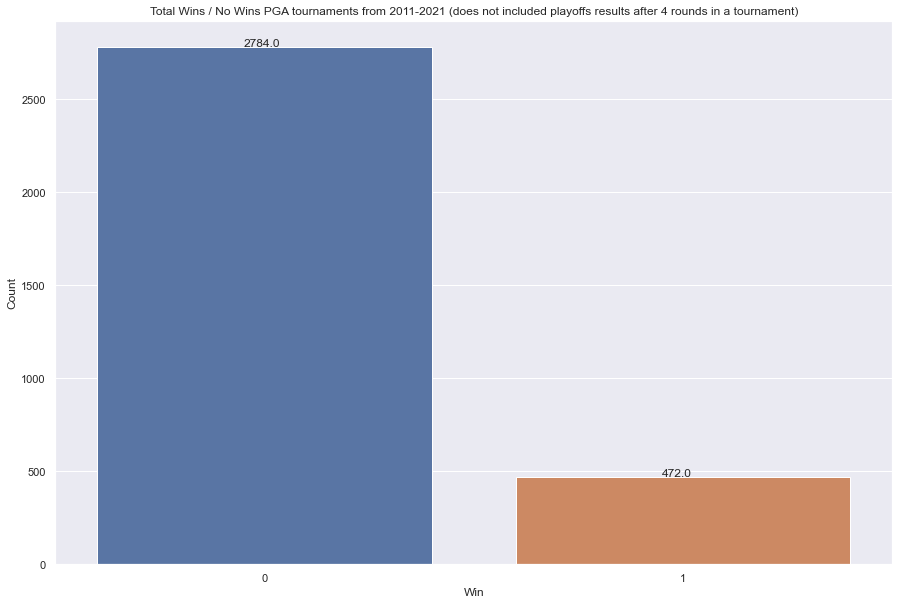

In [579]:
plt.figure(figsize=(15,10))
splot = sns.countplot(data=df_final, x = 'Win')
splot.set_xticklabels(['0', '1'])
plt.xlabel('Win')
plt.ylabel('Count')
plt.title('Total Wins / No Wins PGA tournaments from 2011-2021 (does not included playoffs results after 4 rounds in a tournament)')

for p in splot.patches:
   splot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.05))

plt.show()

<p style='color:red;font-size:14px;font-weight: bold''>Observation:</p><p>The dependent variable: 'Win' is clearly imbalaced. it is
important to point out that in this analisis 'Win' means a player/players  ranked 1st after 4 rounds in a PGA
tournament. Therefore, the playoffs results when players ended up in a tie after final round are not included. In total, 
there were 831 unique players competed from 2011-2021, i.e, there were many who did compete several times during the
aforementioned period.<p>

<h5 style='color:red;font-size:14px'>Values Distribution of the independent variables</h5>

In [ ]:
# Looking at the distribution of data
f, ax = plt.subplots(nrows = 6, ncols = 4, figsize=(20,20))
distribution = df_final.drop(columns=['Win','Year']).columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.distplot(df_final[column], ax=ax[rows][cols])
    cols += 1
    if cols == 4:
        cols = 0
        rows += 1

<p style='color:red;font-size:14px;font-weight: bold''> Observation:</p><p>All the independent variables exhibit  a normal 
distribution<p>

<h5 style='color:red;font-size:20px'>Correlation Matrix and Visualization using Boxplot Independent variables vs. dependent variable "Win"</h5>

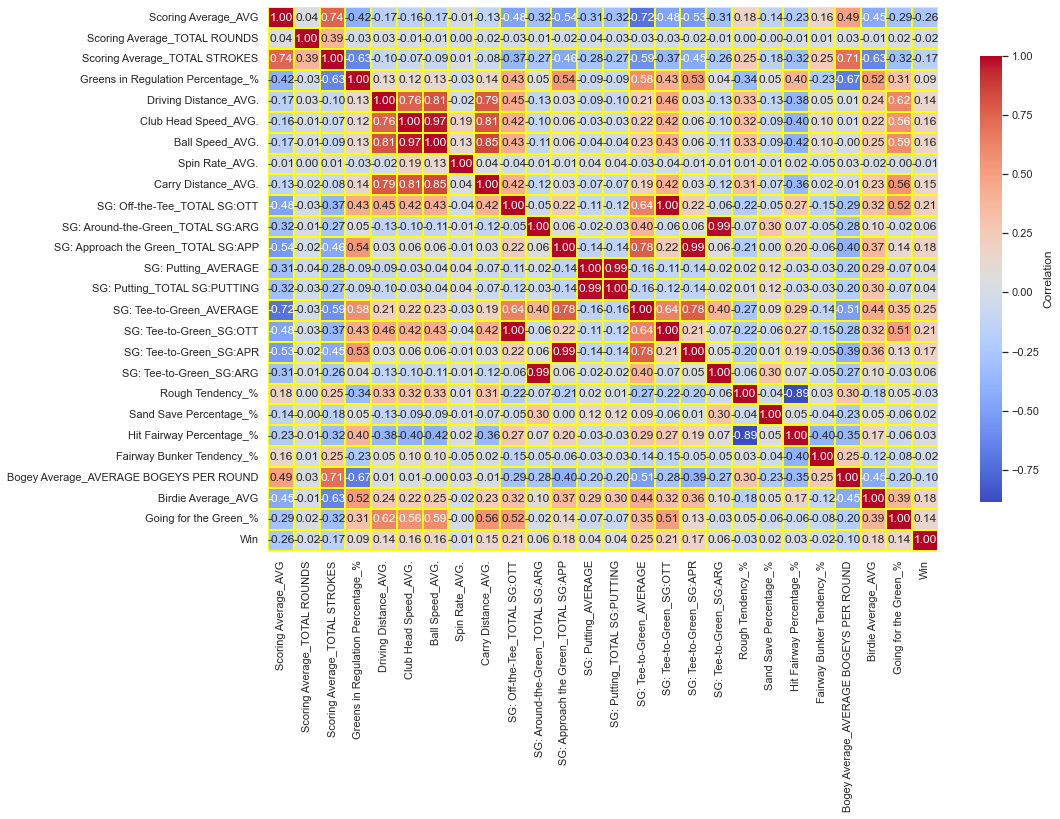

In [339]:
plt.figure(figsize=(15,10))
corr = df_final.drop(columns=['Year']).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',linewidths=2, linecolor='yellow',annot=True, fmt='.2f',  cbar_kws={"shrink": .82,'label': 'Correlation'})
plt.show()

<p style='color:red;font-size:14px;font-weight: bold''> Observation:</p><p> the following independent variables are 
highly positive correlated between each other: 'Club Head Speed_AVG.' and 'Ball Speed_AVG.', 'Carry Distance_AVG.' and 
'Ball Speed_AVG.,'SG: Around-the-Green_TOTAL SG:ARG' and 'SG: Tee-to-Green_SG:APR', 'SG: Off-the-Tee_TOTAL SG:OTT' and
'SG: Tee-to-Green_AVERAGE','SG: Approach the Green_TOTAL SG:APP' and 'SG: Tee-to-Green_SG:APR','SG: Off-the-Tee_TOTAL SG:OTT'
and 'SG: Tee-to-Green_SG:OTT','SG: Tee-to-Green_SG:ARG' and 'SG: Approach the Green_TOTAL SG:APP', 'SG: Around-the-Green_TOTAL SG:ARG '
and 'SG: Tee-to-Green_SG:APR'<p>

In [471]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 0 to 4121
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Scoring Average_AVG                     3256 non-null   float64
 1   Scoring Average_TOTAL ROUNDS            3256 non-null   float64
 2   Scoring Average_TOTAL STROKES           3256 non-null   float64
 3   Greens in Regulation Percentage_%       3256 non-null   float64
 4   Driving Distance_AVG.                   3256 non-null   float64
 5   Club Head Speed_AVG.                    3256 non-null   float64
 6   Ball Speed_AVG.                         3256 non-null   float64
 7   Spin Rate_AVG.                          3256 non-null   float64
 8   Carry Distance_AVG.                     3256 non-null   float64
 9   SG: Off-the-Tee_TOTAL SG:OTT            3256 non-null   float64
 10  SG: Around-the-Green_TOTAL SG:ARG       3256 non-null   floa

<h5 style='color:red;font-size:14px'> Visualization of the independent variables colour code by the dependent variable: 'Win' using Boxplots</h5>

Index(['Scoring Average_AVG', 'Scoring Average_TOTAL STROKES',
       'Greens in Regulation Percentage_%', 'Driving Distance_AVG.',
       'Club Head Speed_AVG.', 'Spin Rate_AVG.', 'Carry Distance_AVG.',
       'SG: Off-the-Tee_TOTAL SG:OTT', 'SG: Around-the-Green_TOTAL SG:ARG',
       'SG: Approach the Green_TOTAL SG:APP', 'SG: Putting_AVERAGE',
       'SG: Tee-to-Green_AVERAGE', 'Sand Save Percentage_%',
       'Hit Fairway Percentage_%', 'Fairway Bunker Tendency_%',
       'Bogey Average_AVERAGE BOGEYS PER ROUND', 'Birdie Average_AVG',
       'Going for the Green_%', 'Win'],
      dtype='object')


IndexError: index 5 is out of bounds for axis 0 with size 5

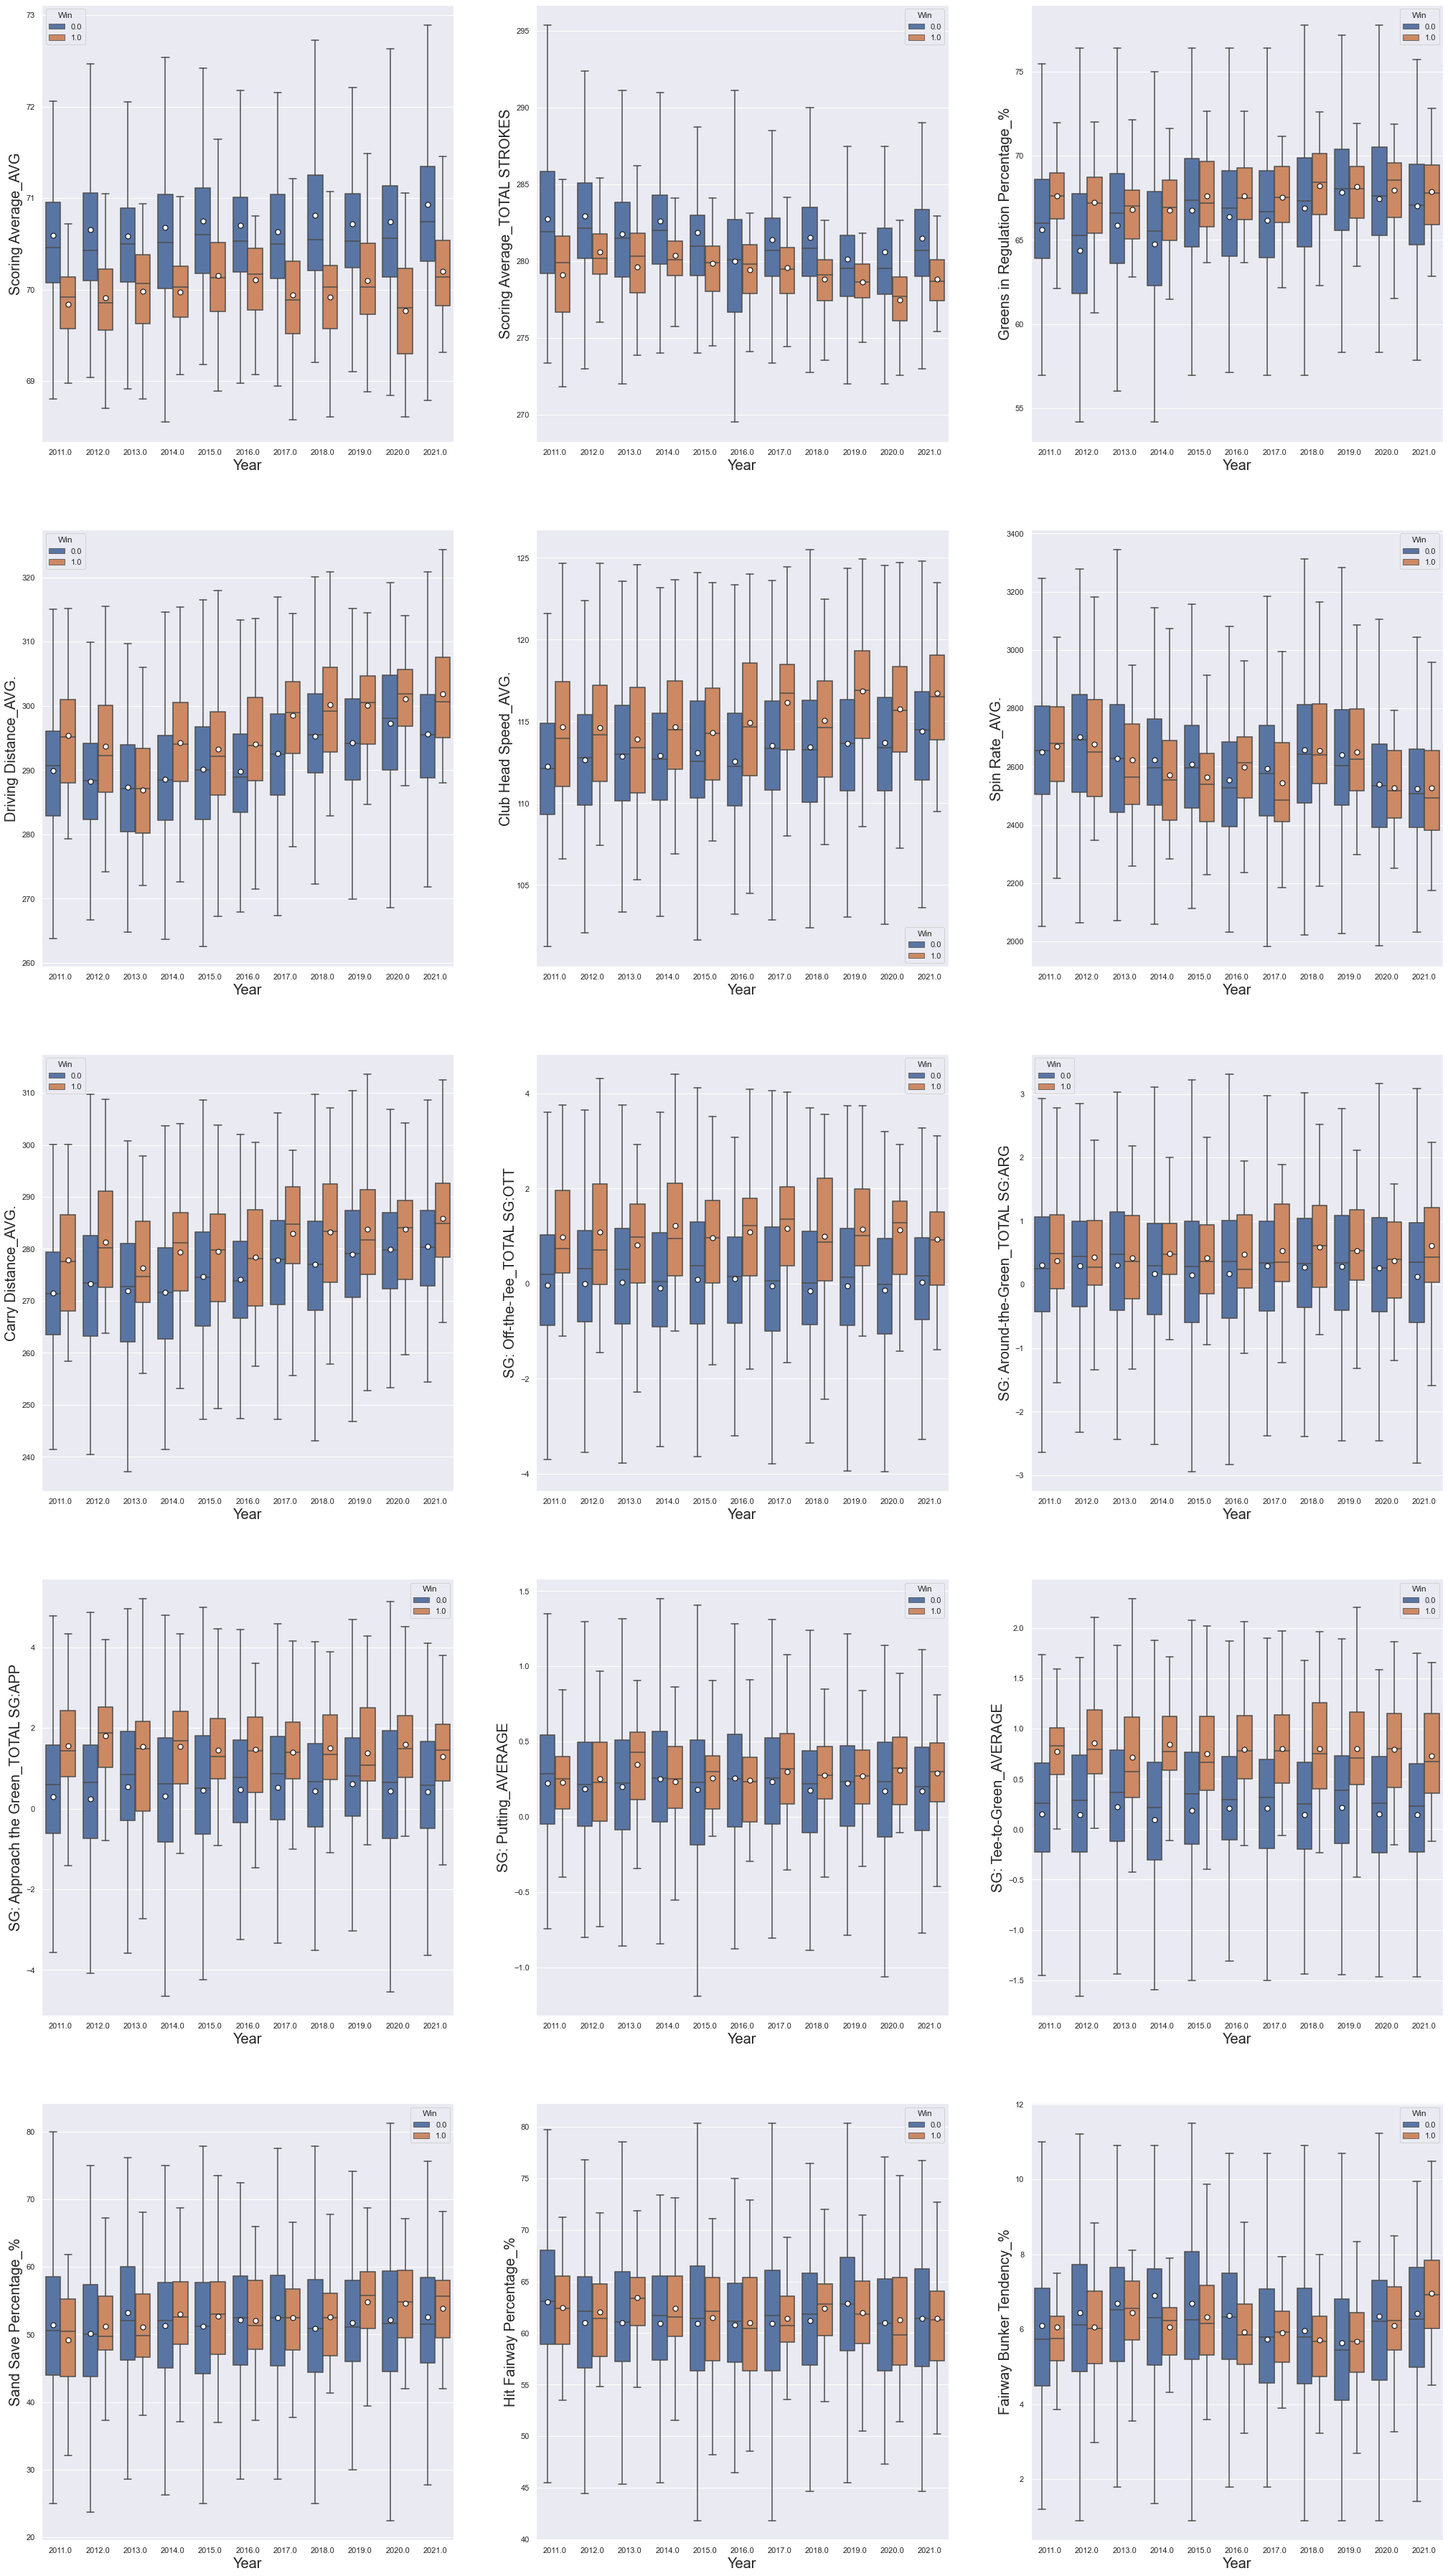

In [472]:
# Looking at the changes in statistics over time 

df_final2=df_final.drop(['Scoring Average_TOTAL ROUNDS','Ball Speed_AVG.','SG: Tee-to-Green_SG:OTT','SG: Tee-to-Green_SG:ARG','SG: Tee-to-Green_SG:APR',
           'SG: Putting_TOTAL SG:PUTTING','Rough Tendency_%'], axis = 1)

f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
distribution =df_final2.loc[:,(df_final2.columns!='Wins')].columns
distribution = distribution[distribution != 'Year']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'Year', y = column, hue='Win',data=df_final2, ax=ax[rows][cols], showfliers=False,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Year',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

<h5 style='color:blue;font-size:14px'> Histogram of final independent variables</h5>

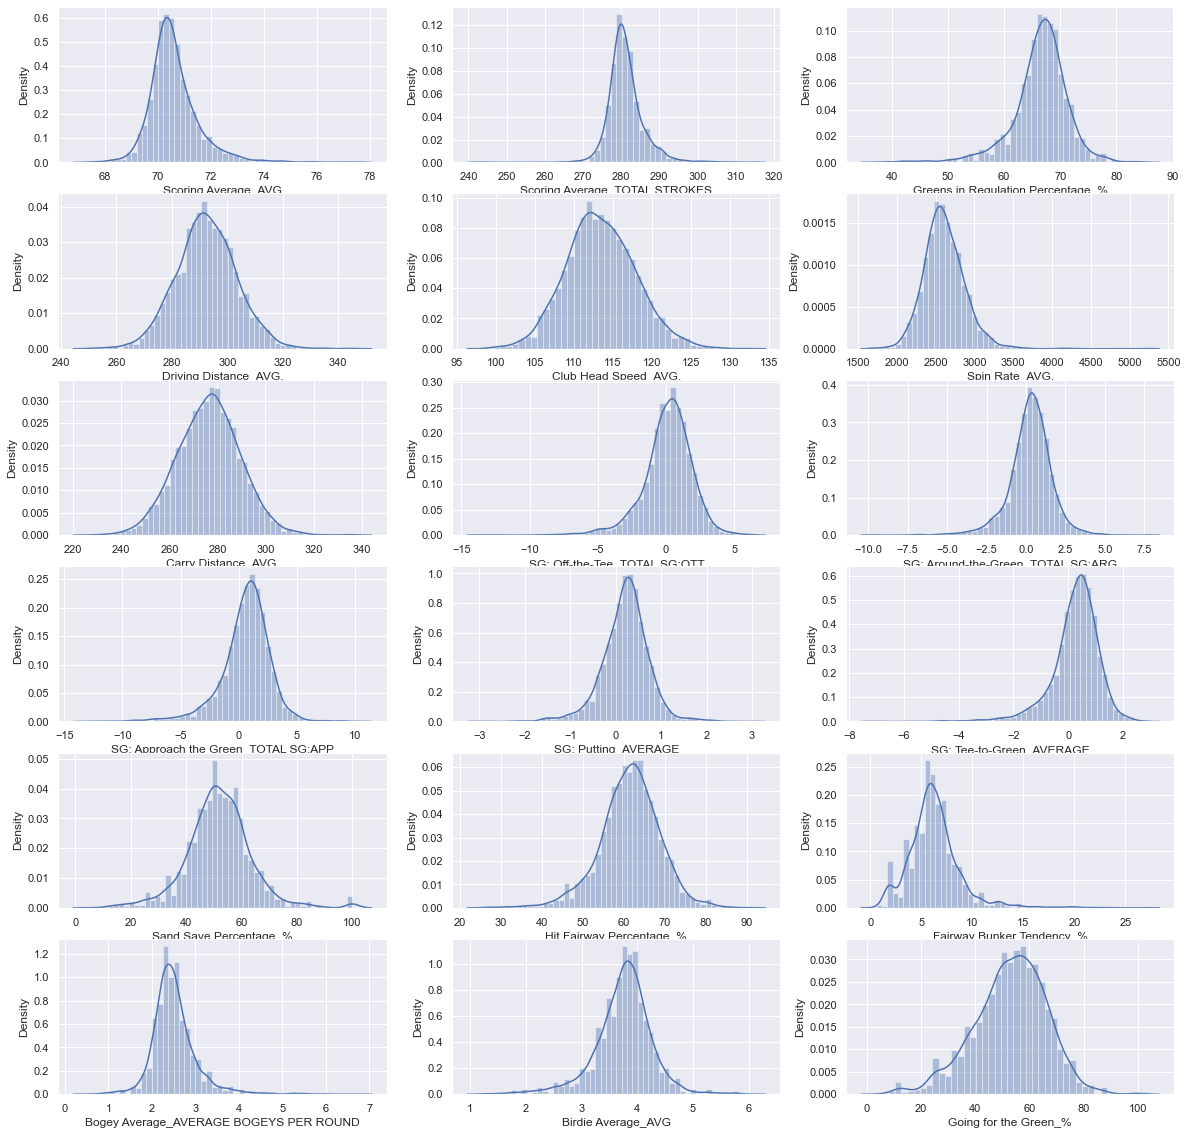

In [477]:
# distribution of the independent variables
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20,20))
distribution = df_final2.drop(columns=['Win','Year']).columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.distplot(df_final2[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

<h5 style='color:blue;font-size:14px'> Statistical Summary of the independent variables</h5>

In [ ]:
df_final2.drop(columns=['Year', 'Win']).describe()

<h6 style='color:blue;font-size:18px'>Splitting the variables</h6>

In [605]:
X=df_final.drop(['Win','Year','Scoring Average_TOTAL ROUNDS','Ball Speed_AVG.','SG: Tee-to-Green_SG:OTT',
                 'SG: Tee-to-Green_SG:ARG','SG: Tee-to-Green_SG:APR','SG: Putting_TOTAL SG:PUTTING',
                 'Rough Tendency_%'], axis = 1)
y = df_final['Win']

<h6 style='color:blue;font-size:18px'>Cross-Validation</h6>

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y)

<h4 style='color:red;font-size:18px'>Modelling</h4>
<p>Although, working with imbalance data is always a challenge for any particular Machine Learning Model, two models
were considered for the analysis: Logistic Regression, and KNeighborsClassifier. The last one mainly for comparison purpose. 
The metric used to estimate the optimum parameters for each model was 'roc_auc', since it works quite well for 
imbalance data</p>

<h6 style='color:blue;font-size:18px'>Logistic Regression</h6>

In [607]:
param_lgr = {'log__penalty':['l1','l2'],'log__C': np.logspace(-3,3,7),'log__solver':['newton-cg', 'lbfgs', 
                                                                                     'liblinear', 'sag', 'saga']}

In [608]:
pipeline_lgr=Pipeline([('scale', StandardScaler()), ('log', LogisticRegression(random_state=42, class_weight='w'))])
pipeline_lgr

Pipeline(steps=[('scale', StandardScaler()),
                ('log', LogisticRegression(class_weight='w', random_state=42))])

In [609]:
roc_preds_grid_lgr=GridSearchCV(pipeline_lgr, param_grid=param_lgr,scoring='roc_auc',cv = 5)
roc_preds_grid_lgr.fit(X_train,y_train)


best_score_test_lgr=roc_preds_grid_lgr.score(X_test,y_test)
best_score_train_lgr=roc_preds_grid_lgr.score(X_train,y_train)
best_params_roc_preds_lgr=roc_preds_grid_lgr.best_params_

golf_train_preds = roc_preds_grid_lgr.predict(X_train)
golf_test_preds = roc_preds_grid_lgr.predict(X_test)
golf_train_mse = mean_squared_error(y_train,golf_train_preds)
golf_test_mse = mean_squared_error(y_test, golf_test_preds)

print(f'roc_auc train: {best_score_train_lgr: .3f}',f'roc_auc test: {best_score_test_lgr: .3f}')
print("Tuned Hyperparameters Logistic Regression :", best_params_roc_preds_lgr)

print(f'mse train: {golf_train_mse: .3f}',f'mse test: {golf_test_mse : .3f}')

n_splits_lgr  = roc_preds_grid_lgr.n_splits_ 
n_iter_lgr = pd.DataFrame(roc_preds_grid_lgr.cv_results_).shape[0]
mean_time_lgr=np.mean(roc_preds_grid_lgr.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_lgr* n_splits_lgr * n_iter_lgr: .3f}')

core_predict_knf=precision_score(y_test,roc_preds_grid_lgr.predict(X_test))
score_recall_knf=recall_score(y_test, roc_preds_grid_lgr.predict(X_test))
print(f'Precision Logistic Regression: {score_predict_knf: .3f}',f'Recall Logistic Regression: {score_recall_knf: .3f}')

roc_auc train:  0.774 roc_auc test:  0.790
Tuned Hyperparameters Logistic Regression : {'log__C': 1.0, 'log__penalty': 'l1', 'log__solver': 'saga'}
mse train:  0.141 mse test:  0.138
Elapsed Time using GridSearchCV:  6.295
Precision Logistic Regression:  0.677 Recall Logistic Regression:  0.153


In [591]:
score_predict_knf=precision_score(y_test,roc_preds_grid_lgr.predict(X_test))
score_recall_knf=recall_score(y_test, roc_preds_grid_lgr.predict(X_test))
print(f'Precision Logistic Regression: {score_predict_knf: .3f}',f'Recall Logistic Regression: {score_recall_knf: .3f}')

Precision Logistic Regression:  0.640 Recall Logistic Regression:  0.136


<h6 style='color:blue;font-size:18px'> K-Nearest Neighbor</h6>

In [600]:
pipeline_knn=Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
pipeline_knn

Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [601]:
param2_knn={'knn__n_neighbors':np.array(range(1,21,2)),'knn__weights' : ['uniform', 'distance'],'knn__p':[1,2]}

In [602]:
roc_preds_grid_knn=GridSearchCV(pipeline_knn, param_grid=param2_knn,scoring='roc_auc',cv = 5)
roc_preds_grid_knn.fit(X_train,y_train)


best_score_test_knn=roc_preds_grid_knn.score(X_test,y_test)
best_score_train_knn=roc_preds_grid_knn.score(X_train,y_train)
best_params_roc_preds_knn=roc_preds_grid_knn.best_params_

golf_train_preds_knn =roc_preds_grid_knn.predict(X_train)
golf_test_preds_knn = roc_preds_grid_knn.predict(X_test)
golf_train_mse_knn = mean_squared_error(y_train,golf_train_preds_knn)
golf_test_mse_knn = mean_squared_error(y_test, golf_test_preds_knn)


print(f'roc_auc train: {best_score_train_knn: .3f}',f'roc_auc test: {best_score_test_knn: .3f}')
print("Tuned Hyperparameters KNearestNeighborsClassifier:", best_params_roc_preds_knn)

print(f'mse train: {golf_train_mse_knn: .3f}',f'mse test: {golf_test_mse_knn : .3f}')

n_splits_knn  = roc_preds_grid_knn.n_splits_ 
n_iter_knn = pd.DataFrame(roc_preds_grid_knn.cv_results_).shape[0]
mean_time_knn=np.mean(roc_preds_grid_knn.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_knn * n_splits_knn * n_iter_knn: .3f}')

score_predict_knf=precision_score(y_test,roc_preds_grid_knn.predict(X_test))
score_recall_knf=recall_score(y_test, roc_preds_grid_knn.predict(X_test))
print(f'Precision KNeighborsClassifier: {score_predict_knf: .3f}',f'Recall KNeighborsClassifier: {score_recall_knf: .3f}')

roc_auc train:  1.000 roc_auc test:  0.791
Tuned Hyperparameters KNearestNeighborsClassifier: {'knn__n_neighbors': 19, 'knn__p': 2, 'knn__weights': 'distance'}
mse train:  0.000 mse test:  0.131
Elapsed Time using GridSearchCV:  1.091
Precision KNeighborsClassifier:  0.677 Recall KNeighborsClassifier:  0.178


<h3 style="color:red;">Evaluation</h3>

<h6 style='color:blue;font-size:18px'>Precision-Recal Curve</h6>
<p> This type of curve works much better for moderate to large imbalanced data than the ROC-curve. This curve 
indicates that the best model is KNeighborsClassifier model (purple line) by relative slighlty margin over Logistic Regression model(red lines).
</p>

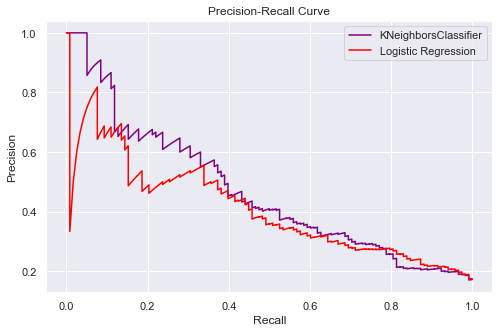

In [614]:
y_score_knn = roc_preds_grid_knn.predict_proba(X_test)[:, 1]
y_score_lgr = roc_preds_grid_lgr.predict_proba(X_test)[:, 1]
#y_score_svc = precision_preds_grid_svc.predict_proba(X_test)[:, 1]
#y_score_tree = tree_grid.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_score_knn)
precision_lgr, recall_lgr, thresholds_lgr = precision_recall_curve(y_test, y_score_lgr)
#precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_test, y_score_svc)
#precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_score_tree)
fig, ax = plt.subplots()
ax.plot(recall_knn, precision_knn, color='purple',label='KNeighborsClassifier')
ax.plot(recall_lgr, precision_lgr, color='red',label='Logistic Regression')
#ax.plot(recall_svc, precision_svc, color='blue',label='SVC')
#ax.plot(recall_tree, precision_tree, color='green',label='Decision Tree')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend(loc='best')

#display plot
plt.show()

<h6 style='color:blue;font-size:18px'>Confusion Matrix to visually analyze predicting behavior of the models tested</h6>

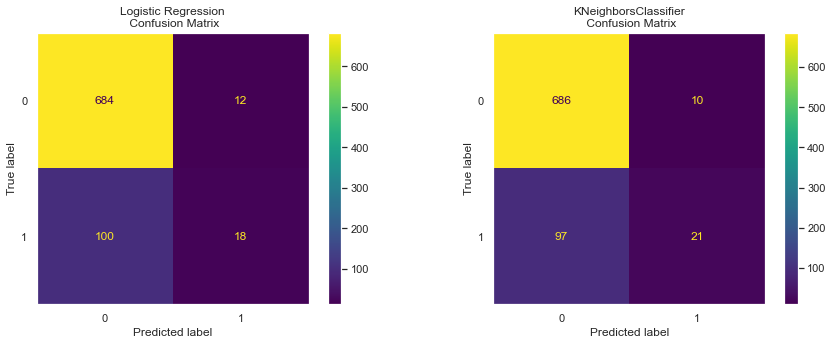

In [611]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, roc_preds_grid_lgr.predict(X_test), display_labels = ['0', '1'], ax = ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, roc_preds_grid_knn.predict(X_test), display_labels = ['0', '1'], ax = ax[1])
#ConfusionMatrixDisplay.from_predictions(y_test, tree_grid.predict(X_test), display_labels = ['0', '1'], ax = ax[2])
ax[0].grid(False)
ax[1].grid(False)
#ax[2].grid(False)
ax[0].set_title('Logistic Regression\n Confusion Matrix')
ax[1].set_title('KNeighborsClassifier\n Confusion Matrix')
#ax[2].set_title('Support Vector Machine\n Confusion Matrix')
plt.show()

<h5 style='color:blue;font-size:18px'>Using permutation_importance to rank the importance of independent variables by predicting the dependent variable 'Win'</h5>

In [615]:
r = permutation_importance(roc_preds_grid_knn,X_test, y_test,n_repeats=30,random_state=0)    
perm=pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(by = "Importance", ascending = False)

In [612]:
def max_value_in_column(column):    

    highlight = 'background-color: yellow;'
    default = ''

    max_in_column = column.max()

    return [highlight if z == max_in_column else default for z in column] 

def min_value_in_column(column):    

    highlight = 'background-color: yellow;'
    default = ''

    min_in_column = column.min()

    return [highlight if z == min_in_column else default for z in column] 


heading_properties = [('font-size', '20px')]

cell_properties = [('font-size', '18px')]

df_1_style = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]

In [616]:
perm.query('Importance>0.000').style.set_table_styles(df_1_style).apply(max_value_in_column, subset=['Importance'], axis=0)

,Column,Importance
0,Scoring Average_AVG,0.050297
2,Greens in Regulation Percentage_%,0.018554
17,Going for the Green_%,0.017491
11,SG: Tee-to-Green_AVERAGE,0.017153
16,Birdie Average_AVG,0.016400
7,SG: Off-the-Tee_TOTAL SG:OTT,0.013362
10,SG: Putting_AVERAGE,0.008118
9,SG: Approach the Green_TOTAL SG:APP,0.007825
4,Club Head Speed_AVG.,0.007004
14,Fairway Bunker Tendency_%,0.005257


<h2 style="color:red;">Main Conclusions & Recomendations<h2>

<p>1. The final dataset, after cleaning (there was not need to remove outliers), dropping unnecessary columns consists of 20 columns and 3256 rows. The target columns was "Win" which stands:  Win in a PGA tournament during the period 2011-2021</p>
<p>2. The best classification model is the  K-Nearest Neighbor model for classifying the dataset analyzed in this study. Logistic Regression was not that far. However, both of them performed poorly in some scoring metrics, specially in Recall.</p>
<p> 5. The metric used to estimate the optimum parameters for each model was 'roc_auc', since it works quite well for imbalance data </p>
<p> 6. The precision- recall curve was chosen also as a indicator, since works much better for moderate to large imbalanced data than the ROC-curve, which is the case for the dataset used in this analysis.</p>
<p> 7. The most important independent variable was: 'Scoring Average_AVG'  in both models tested. However, it is interesting that this variable is much more important in the Logistic Regression Model</p>
<p> 8. The independent variables: 'Driving Distance_AVG', and  'Club Head Speed_AVG.' are not within the five most important ones,i.e., indicating that swinging the club faster, and driving the ball longer do not uarantee  that a player will win a tournament. This is a pretty interesting observation that sometimes is overlooked by people who want to initiate their career in golf.</p>
<p> 9. Consistency, i.e, shooting low score, and course management (off the tee and around the green) seem to be the most important aspects to win PGA golf tournaments.
<p> 10.The next steps will consist testing ensembles techniques such as bagging and boostingin order to explore the possibility to increase both Precision and Recall scores, i.e., proving a more robust, powerful, and confident supervized machine learning Classification model.